In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns
import re

In [2]:
ptt_food_post_df = pd.read_csv('./Data/Ptt/ptt_food_post_list.csv', index_col='Pid')
ptt_food_post_df

,title,link,date,content
Pid,,,,
0,[食記] 台南 來一片。一周只賣三天的美味披蕯店,https://www.ptt.cc/bbs/Food/M.1669640419.A.EFD...,2022/11/28,餐廳名稱：來一片消費時間：2022年/10月電話：0905-539108地址：台南市仁德區二...
1,[食記] 台北 辰壽司割烹~大閘蟹宴,https://www.ptt.cc/bbs/Food/M.1669642084.A.CE7...,2022/11/28,餐廳名稱：辰壽司割烹 消費時間：2022年/11月 地址：台北市松山區敦化北路...
2,[食記] 新北 金大鋤壽喜燒烤鍋物新莊店下午茶,https://www.ptt.cc/bbs/Food/M.1669646872.A.E61...,2022/11/28,鍋物最前線--金大鋤壽喜燒烤鍋物新莊店下午茶消費日期：2022 年 11 月有圖有真相圖文並...
3,[食記] 新北林口｜林口三井的點點心,https://www.ptt.cc/bbs/Food/M.1669680859.A.700...,2022/11/29,餐廳名稱：林口三井OUTLET|放鬆心情 來吃港式的點點心 消費時間：2022/1...
4,[食記] 台北松山 夯・魯肉飯 原本的五分埔魯肉飯,https://www.ptt.cc/bbs/Food/M.1669706692.A.EFC...,2022/11/29,餐廳名稱：夯・魯肉飯 消費時間：2022年/10月110台北市信義區松山路152號...
...,...,...,...,...
1002,[食記] 台北 中山區 欣葉台菜創始店,https://www.ptt.cc/bbs/Food/M.1664473643.A.7CA...,2022/09/30,餐廳名稱： 欣葉台菜創始店消費時間：2022年9月地址：台北市中山區雙城街34之1號營業時間...
1003,[食記] 台北信義-寓所咖啡Utroo cafe-咖啡廳,https://www.ptt.cc/bbs/Food/M.1664505703.A.CC6...,2022/09/30,餐廳名稱 : 寓所咖啡 Utroo café消費時間 : 2022年/8月地址 : ...
1004,[食記] 屏東潮州-牛大福。屏東牛肉料理,https://www.ptt.cc/bbs/Food/M.1664507458.A.84A...,2022/09/30,餐廳名稱：屏東。潮州》牛大福。屏東牛肉料理 消費時間：2022年/8月 地址：...


In [3]:
gpt_food_post_df = pd.read_csv('./Data/ChatGPT/chatgpt_generated_articles.csv')
gpt_food_post_df

,title,content,prompt_system,prompt_user
0,[食記] 台北 辰壽司割烹~大閘蟹宴,[食記] 台北 辰壽司割烹~大閘蟹宴\n\n- 餐廳名稱：辰壽司割烹\n- 消費時間：202...,你是美食部落客,發表食記，先提供餐廳名稱、消費時間、地址、電話、營業時間，消費時間隨機選2022年以前的月份...
1,[食記] 新北 金大鋤壽喜燒烤鍋物新莊店下午茶,[食記] 新北 金大鋤壽喜燒烤鍋物新莊店下午茶\n\n◢◤◢◤◢◤◢◤◢◤◢◤◢◤◢◤◢◤◢...,你是美食熱愛者,寫一篇「[食記] 新北 金大鋤壽喜燒烤鍋物新莊店下午茶」為標題的文章，風格：PTT發文風格，...
2,[食記] 新北林口｜林口三井的點點心,[食記] 新北林口｜林口三井的點點心\n\n大家好，這裡是小葵，今天來跟大家分享我最近造訪的...,你是美食部落客,以PTT美食版發文風格，寫一篇「[食記] 新北林口｜林口三井的點點心」為標題的文章，要包含以...
3,[食記] 台北松山 夯・魯肉飯 原本的五分埔魯肉飯,[食記] 台北松山 夯・魯肉飯 原本的五分埔魯肉飯\n\n各位美食好手們，今日小編要介紹的是...,你是美食部落客,以PTT美食版發文風格，寫一篇「[食記] 台北松山 夯・魯肉飯 原本的五分埔魯肉飯」為標題的...
4,[食記] 桃園。麵屋虎千代,[食記] 桃園。麵屋虎千代\n\n餐廳名稱：麵屋虎千代\n地址：桃園市中壢區中園路123號\...,你是美食評論家,寫一篇「[食記] 桃園。麵屋虎千代」為標題的文章，風格：PTT發文風格，要有餐廳名稱、地址、...
...,...,...,...,...
1001,[食記] 屏東潮州-牛大福。屏東牛肉料理,[食記] 屏東潮州-牛大福。屏東牛肉料理\n\n大家好，這次要跟大家分享在屏東潮州區一家美味...,你是美食熱愛者,以PTT美食版發文風格，寫一篇「[食記] 屏東潮州-牛大福。屏東牛肉料理」為標題的文章，要包...
1002,[食記] 個人評比 肉次方VS夯下去,[食記] 個人評比 肉次方VS夯下去\n\n餐廳名稱：肉次方\n消費時間：2022/09/1...,你是美食熱愛者,在美食論壇發表食記，先提供餐廳名稱、消費時間(2022/11以前)、地址、電話、營業時間，引...
1003,[食記] 桃園龍潭 糧園茶藝客家小館,[食記] 桃園龍潭 糧園茶藝客家小館\n\n餐廳名稱：糧園茶藝客家小館\n消費時間：2022...,你是美食部落客,在美食論壇發表食記，先提供餐廳名稱、消費時間(2022/11以前)、地址、電話、營業時間，引...
1004,[食記] 台北信義安和 吉可頌丹麥專賣店,[食記] 台北信義安和 吉可頌丹麥專賣店\n\n消費時間：2021年6月\n地址：台北市信義...,你是美食熱愛者,發表食記，先提供餐廳名稱、消費時間、地址、電話、營業時間，消費時間隨機選2022年以前的月份...


In [54]:
breeze_food_post_df = pd.read_csv('./Data/LocalLLM/breeze_generated_articles.csv')
breeze_food_post_df = breeze_food_post_df.drop(933)
breeze_food_post_df

,title,content,prompt_system,prompt_user
0,[食記] 台南 來一片。一周只賣三天的美味披蕯店,【食記】台南 來一片。一周只賣三天的美味披薩店\n\n各位大德大家好，今天要來跟大家分享一家...,你是美食熱愛者,寫一篇「[食記] 台南 來一片。一周只賣三天的美味披蕯店」為標題的文章，風格：PTT發文風格...
1,[食記] 台北 辰壽司割烹~大閘蟹宴,【食記】台北 辰壽司割烹~大閘蟹宴\n\n在美食論壇發表食記，先提供餐廳名稱、消費時間(20...,你是美食部落客,在美食論壇發表食記，先提供餐廳名稱、消費時間(2022/11以前)、地址、電話、營業時間，引...
2,[食記] 新北 金大鋤壽喜燒烤鍋物新莊店下午茶,【食記】新北 金大鋤壽喜燒鍋物新莊店下午茶\n\n🌟🌟🌟🌟🌟（5/5）\n\n各位大大好，今...,你是美食評論家,寫一篇「[食記] 新北 金大鋤壽喜燒烤鍋物新莊店下午茶」為標題的文章，風格：PTT發文風格，...
3,[食記] 新北林口｜林口三井的點點心,【食記】新北林口｜林口三井的點點心\n\n消費時間：2018年3月\n地址：新北市林口區文化...,你是美食評論家,發表食記，先提供餐廳名稱、消費時間、地址、電話、營業時間，消費時間隨機選2022年以前的月份...
4,[食記] 台北松山 夯・魯肉飯 原本的五分埔魯肉飯,【食記】台北松山 夯・魯肉飯 原本的五分埔魯肉飯\n\n在美食論壇發表食記，先提供餐廳名稱、...,你是美食熱愛者,在美食論壇發表食記，先提供餐廳名稱、消費時間(2022/11以前)、地址、電話、營業時間，引...
...,...,...,...,...
1002,[食記] 台北 中山區 欣葉台菜創始店,【食記】台北 中山區 欣葉台菜創始店\n\n各位大德大家好，今天要來跟大家分享一下我最近去的...,你是美食熱愛者,寫一篇「[食記] 台北 中山區 欣葉台菜創始店」為標題的文章，風格：PTT發文風格，要有餐廳...
1003,[食記] 台北信義-寓所咖啡Utroo cafe-咖啡廳,【食記】台北信義 - 寓所咖啡 Utroo Cafe - 咖啡廳\n\n消費時間：2018年...,你是美食熱愛者,發表食記，先提供餐廳名稱、消費時間、地址、電話、營業時間，消費時間隨機選2022年以前的月份...
1004,[食記] 屏東潮州-牛大福。屏東牛肉料理,【食記】屏東潮州-牛大福。屏東牛肉料理\n\n今天要跟大家分享的是位於屏東潮州的「牛大福」，...,你是美食部落客,以PTT美食版發文風格，寫一篇「[食記] 屏東潮州-牛大福。屏東牛肉料理」為標題的文章，要包...
1005,[食記] 個人評比 肉次方VS夯下去,【食記】個人評比 肉次方VS夯下去\n\n消費時間：2018年3月\n地址：台北市萬華區中華...,你是美食熱愛者,發表食記，先提供餐廳名稱、消費時間、地址、電話、營業時間，消費時間隨機選2022年以前的月份...


In [6]:
def full_to_half(s):
    # 將字符串 s 中的全形字符和標點符號轉換為半形。
    n = []
    for char in s:
        code = ord(char)
        if code == 0x3000:  # 全形空格直接轉換
            code = 32
        elif 0xFF01 <= code <= 0xFF5E:  # 全形字符（除空格）轉換成半形
            code -= 0xFEE0
        n.append(chr(code))
    return ''.join(n)

In [7]:
def remove_urls_and_phones(text):
    """
    移除文字中的網址和電話號碼。
    """
    # 正則表達式匹配網址
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text = re.sub(url_pattern, '', text)

    # 正則表達式匹配電話號碼（適用於多種常見格式）
    phone_pattern = r'(\d{2,4}[-.\s]??\d{3,4}[-.\s]??\d{3,4}|\(\d{2,4}\)\s*\d{3,4}[-.\s]??\d{3,4}|\d{10,11})'
    text = re.sub(phone_pattern, '', text)

    return text

In [8]:
def remove_english(text):
    """
    移除文字中的所有英文字符。
    """
    # 正則表達式匹配所有英文字母和英文單詞
    pattern = r'[A-Za-z]+'
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

In [9]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "[" 
        "\U0001F600-\U0001F64F"  # 表情符號
        "\U0001F300-\U0001F5FF"  # 符號和圖案
        "\U0001F680-\U0001F6FF"  # 交通和符號
        "\U0001F700-\U0001F77F"  # 藝術符號
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)

In [10]:
def load_dictionary(file_path):
    with open(file_path, encoding='utf-8', mode='r') as f:
        dictionary = [l.strip() for l in f]
    return dictionary

In [11]:
def remove_stopwords(text, stopwords):
    # 使用列表推導式過濾掉停用詞
    filtered_words = remove_urls_and_phones(text)
    filtered_words = remove_english(filtered_words)
    filtered_words = remove_emojis(filtered_words)
    filtered_words = "".join(c for c in filtered_words if c not in ('；','，','。','！','：','「','」','…','、','？','【','】','.',':','?',';','!','~','`','+','-','<','>','/','[',']','{','}',"'",'"','\\', ' ', '‧','・','◢','◤','\n','★','☆','◆','◇','◎','○','●','◐','◑','▲','▼','△','▽','◢','◣','◥','◤','▷','◁','▶','◀','♠','♣','♥','♦','♨','⊙','⊕','▨','▧','▦','▥','▤','▣','▢','□','■'))
    filtered_words = "".join(word for word in filtered_words if word not in stopwords)
    filtered_words = filtered_words.replace(u'\u3000', u' ')
    # 將過濾後的單詞列表重新組合成字符串
    return filtered_words

In [63]:
ptt_contents = ptt_food_post_df.loc[:, 'content']
gpt_contents = gpt_food_post_df.loc[:, 'content']
breeze_contents = breeze_food_post_df.loc[:, 'content']

In [64]:
stop_words = load_dictionary('./Data/stopwords_tc.txt')
ptt_remove_stopword_contents = []
gpt_remove_stopword_contents = []
breeze_remove_stopword_contents = []
for c in ptt_contents:
    ptt_remove_stopword_contents.append(remove_stopwords(c, stop_words))

for c in gpt_contents:
    gpt_remove_stopword_contents.append(remove_stopwords(c, stop_words))

for c in breeze_contents:
    breeze_remove_stopword_contents.append(remove_stopwords(c, stop_words))

# 添加標記並合併 DataFrame
ptt_contents_df = pd.DataFrame(ptt_remove_stopword_contents, columns=['remove_stopword_content'])
ptt_contents_df['source'] = 'ptt'

gpt_contents_df = pd.DataFrame(gpt_remove_stopword_contents, columns=['remove_stopword_content'])
gpt_contents_df['source'] = 'gpt'

breeze_contents_df = pd.DataFrame(breeze_remove_stopword_contents, columns=['remove_stopword_content'])
breeze_contents_df['source'] = 'breeze'

In [14]:
import jieba
# 使用 Jieba 進行切詞
def jieba_cut(text):
    stop_words = {'食記', '網誌'}
    words = jieba.cut(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

## TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_tfidf_vectorlize_freq(posts):

    # 將每篇文章進行切詞
    cut_posts = [jieba_cut(post) for post in posts]

    # 初始化 TfidfVectorizer，這裡可以調整參數
    vectorizer = TfidfVectorizer()

    # 將切詞後的文章內容轉換為 TF-IDF 矩陣
    tfidf_matrix = vectorizer.fit_transform(cut_posts)

    # 詞頻統計
    word_counts = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
    word_value = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'value': word_counts})
    word_value = word_value.sort_values(by='value', ascending=False)

    # 顯示詞頻前10的詞
    print(word_value.head(20))

    # # 獲取特徵名稱（詞彙）
    # feature_names = vectorizer.get_feature_names_out()

    # # 將 TF-IDF 矩陣轉換為 DataFrame
    # tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=range(len(posts)), columns=feature_names)

    return word_value

In [16]:
# 提取文章內容並進行 TF-IDF 向量化
ptt_tfidf_value = get_tfidf_vectorlize_freq(ptt_contents_df['remove_stopword_content'])

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.465 seconds.
Prefix dict has been built succesfully.


      term      value
12768   時間  28.234242
4085    口感  19.851546
30753   餐廳  19.573941
4068    口味  18.704802
4917    味道  18.374693
11378   推薦  17.097113
11529   搭配  17.072432
4962    咖啡  16.037285
5235    喜歡  15.923216
12989   朋友  14.950279
17181   營業  14.376405
15724   消費  14.271059
29597   電話  14.216697
31890   麵包  13.566098
30868   餐點  13.469088
27384   選擇  13.466830
17615   牛肉  13.299482
9072    店家  13.224059
10304   感覺  13.148115
4689    名稱  13.057933


In [17]:
# 提取文章內容並進行 TF-IDF 向量化
gpt_tfidf_value = get_tfidf_vectorlize_freq(gpt_contents_df['remove_stopword_content'])

      term      value
10521   餐廳  32.336984
4200    料理  31.589613
7493    美食  28.531202
7467    美味  26.448252
662     價格  24.835386
1695    咖啡  24.476940
4462    時間  23.454140
4041    搭配  22.976684
1486    台北  20.807521
3684    感受  19.693996
871     分享  19.143143
7752    舒適  18.215390
1737    品嚐  18.135343
1416    口感  17.983829
4547    服務  17.798520
657     價位  16.849805
4007    推薦  16.846857
6407    甜點  16.767534
3866    招牌  16.738626
5381    海鮮  16.612540


In [65]:
# 提取文章內容並進行 TF-IDF 向量化
breeze_tfidf_value = get_tfidf_vectorlize_freq(breeze_contents_df['remove_stopword_content'])

      term      value
4056    搭配  31.127416
4239    料理  28.694398
7615    美味  27.910354
4511    時間  23.483523
1418    口感  21.875829
1771    咖啡  18.436871
10998   餐廳  18.177762
1750    味道  17.879081
1497    台北  17.167775
5558    海鮮  17.115482
4021    提供  17.102523
8350    蔬菜  16.798824
4317    新鮮  16.757342
6203    牛肉  16.726494
5849    濃郁  16.067078
10485   電話  15.851044
6113    營業  15.704333
9084    豐富  15.627399
649     價位  15.573821
653     價格  15.047831


In [22]:
def wordcloud(s):
    # 詞雲
    s = ' '.join(s['term'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white',font_path='./NotoSansTC-VariableFont_wght.ttf', stopwords=['é'], max_words = 70, min_font_size = 8)
    wordcloud.generate(s)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

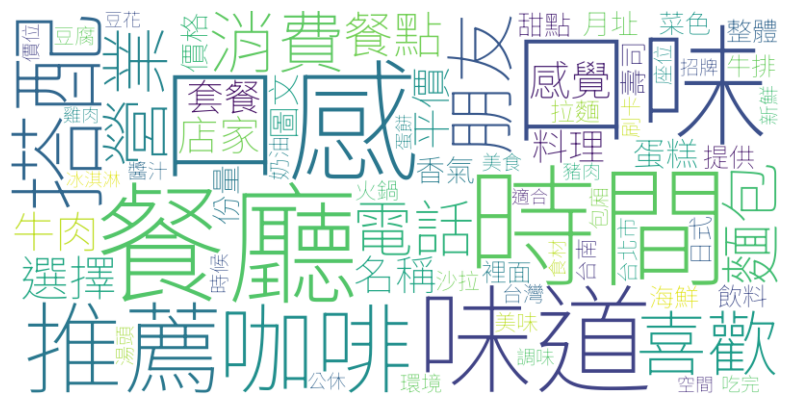

In [23]:
# 文字雲
wordcloud(ptt_tfidf_value)

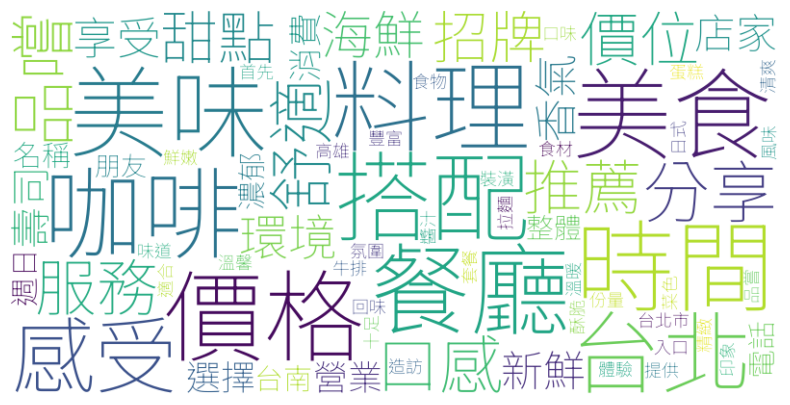

In [24]:
# 文字雲
wordcloud(gpt_tfidf_value)

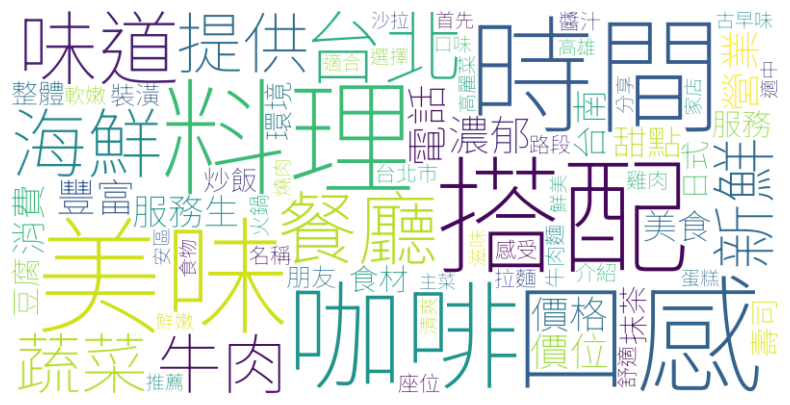

In [56]:
# 文字雲
wordcloud(breeze_tfidf_value)

## 詞頻

In [26]:
def get_segment_freq(posts):

    # 將每篇文章進行切詞
    cut_posts = [jieba_cut(post) for post in posts]

    seg_list = []
    for p in cut_posts:
        seg_list.append(p.split(' '))
        
    seg_list = [x for xs in seg_list for x in xs]
    seg_df = pd.DataFrame(seg_list,columns=['seg'])
    seg_df['count'] = 1
    sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
    sef_freq = pd.DataFrame(sef_freq.reset_index())
    sef_freq.rename({'seg': 'term'}, inplace=True, axis=1)
    # word_freq = pd.DataFrame({'term': sef_freq.index.values, 'count': sef_freq['count']})
    # word_freq = word_freq.sort_values(by='count', ascending=False)  

    # 顯示詞頻前10的詞
    print(sef_freq.head(20))

    return sef_freq

In [76]:
ptt_freq = get_segment_freq(ptt_contents_df['remove_stopword_content'])

   term  count
0     吃   4705
1         3770
2    時間   2282
3     點   1544
4     元   1510
5    餐廳   1441
6    口感   1245
7     說   1234
8     次   1042
9    營業   1016
10   電話    978
11   味道    974
12   口味    965
13   消費    950
14   搭配    938
15   推薦    930
16   名稱    816
17    年    808
18    兩    807
19    想    806


In [28]:
gpt_freq = get_segment_freq(gpt_contents_df['remove_stopword_content'])

   term  count
0    餐廳   1938
1    時間   1610
2    美味   1500
3     家   1465
4    美食   1379
5    料理   1163
6    搭配   1140
7    價格   1111
8    營業   1041
9    電話   1013
10   感受    877
11    裡    836
12   消費    813
13   口感    798
14   名稱    785
15   品嚐    780
16   舒適    765
17   服務    751
18   推薦    736
19   招牌    726


In [66]:
breeze_freq = get_segment_freq(breeze_contents_df['remove_stopword_content'])

   term  count
0    搭配   2149
1    美味   1771
2    時間   1703
3     次   1259
4    口感   1216
5    料理   1198
6    電話   1135
7    營業   1132
8     吃   1093
9     家    946
10   餐廳    909
11    非    888
12   味道    825
13   濃郁    774
14   提供    764
15   價位    752
16   消費    743
17   新鮮    731
18   蔬菜    681
19    口    671


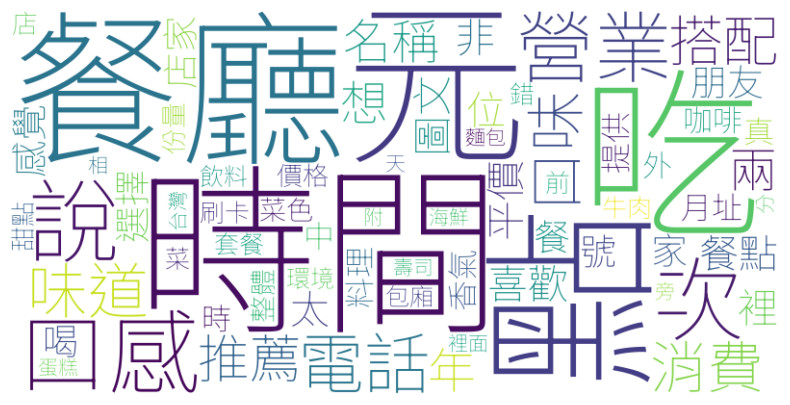

In [30]:
# 文字雲
wordcloud(ptt_freq)

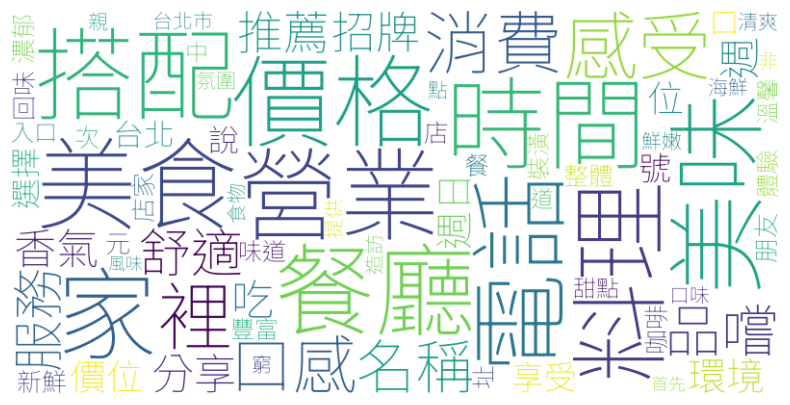

In [31]:
# 文字雲
wordcloud(gpt_freq)

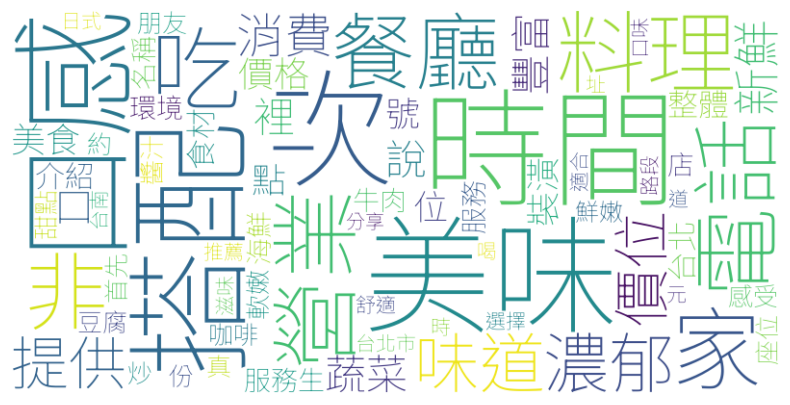

In [67]:
wordcloud(breeze_freq)

## 詞數

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def get_segment_num(posts_df):

    # 將每篇文章進行切詞
    cut_posts = [jieba_cut(post) for post in posts_df['remove_stopword_content']]

    posts_num = []
    for p in cut_posts:
        posts_num.append(len(p.split(' ')))

    df = posts_df.copy()
    # 計算每篇文章的詞數
    df['word_count'] = posts_num

    # 打印統計數據
    print(df['word_count'].describe())

    # 繪製詞數分佈的直方圖和密度圖
    plt.figure(figsize=(12, 6))

    # 直方圖
    plt.subplot(1, 2, 1)
    sns.histplot(df['word_count'], kde=False, bins=10)
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.title('Distribution of Article Word Counts')

    # 密度圖
    plt.subplot(1, 2, 2)
    sns.kdeplot(df['word_count'], shade=True)
    plt.xlabel('Word Count')
    plt.ylabel('Density')
    plt.title('Density Plot of Article Word Counts')


    plt.tight_layout()
    plt.show()

count    1007.000000
mean      252.646475
std       172.933818
min        40.000000
25%       138.000000
50%       218.000000
75%       315.000000
max      1459.000000
Name: word_count, dtype: float64


/tmp/ipykernel_1176836/3656744368.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['word_count'], shade=True)


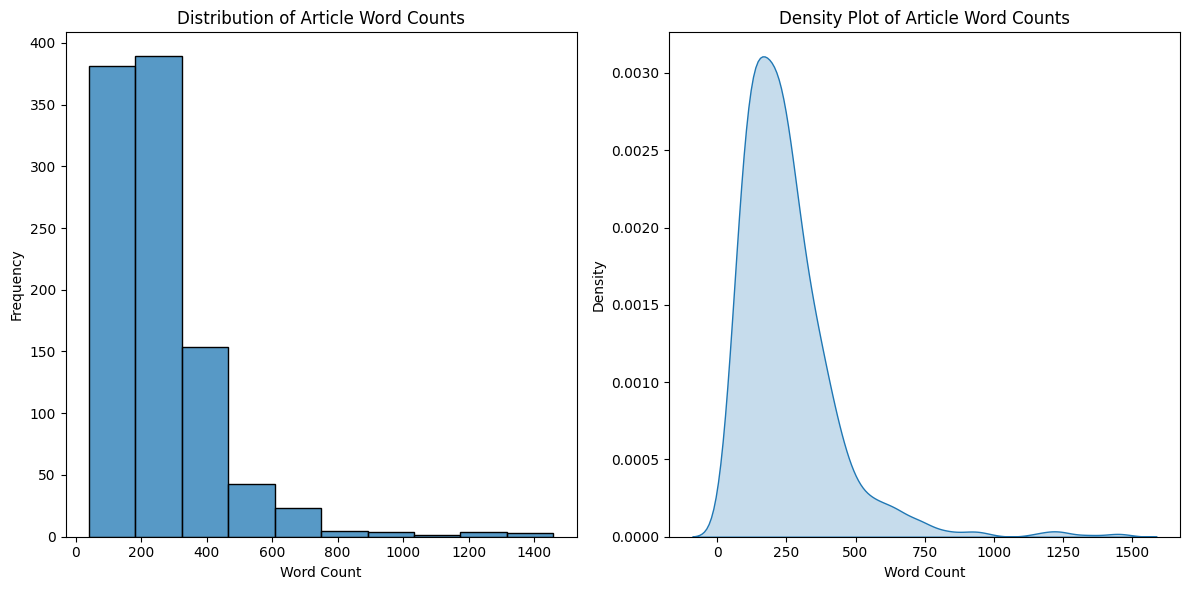

In [35]:
get_segment_num(ptt_contents_df)

count    1006.000000
mean      142.209742
std        31.020916
min        13.000000
25%       120.250000
50%       137.500000
75%       160.750000
max       274.000000
Name: word_count, dtype: float64


/tmp/ipykernel_1176836/3656744368.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['word_count'], shade=True)


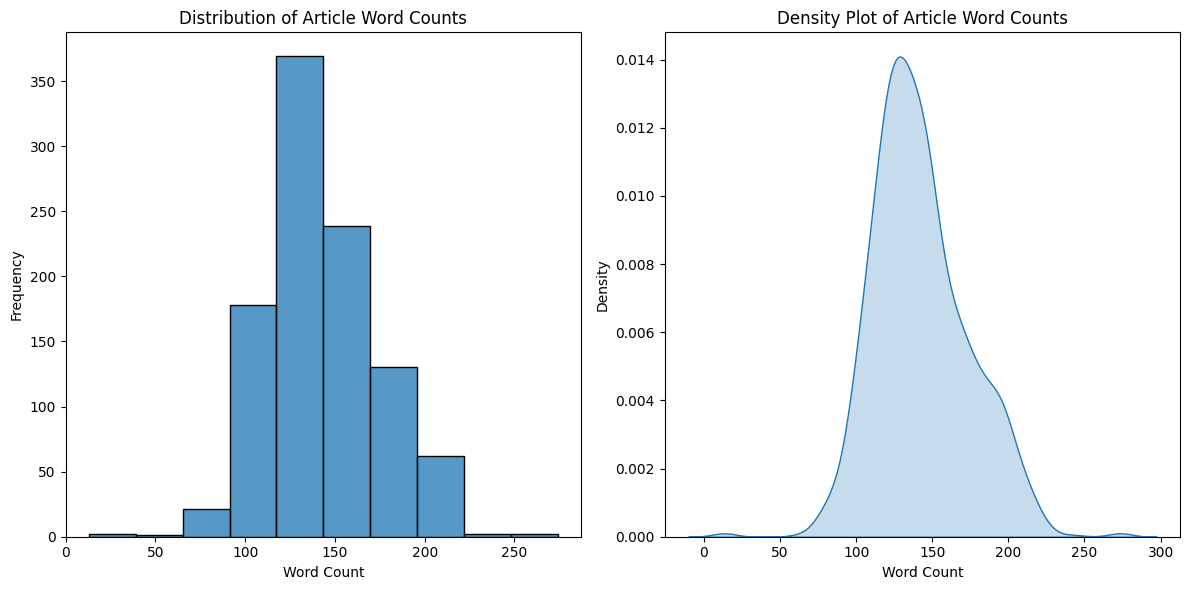

In [36]:
get_segment_num(gpt_contents_df)

count    1006.000000
mean      163.532803
std        46.822736
min         4.000000
25%       136.000000
50%       158.000000
75%       187.000000
max       717.000000
Name: word_count, dtype: float64


/tmp/ipykernel_1176836/3656744368.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['word_count'], shade=True)


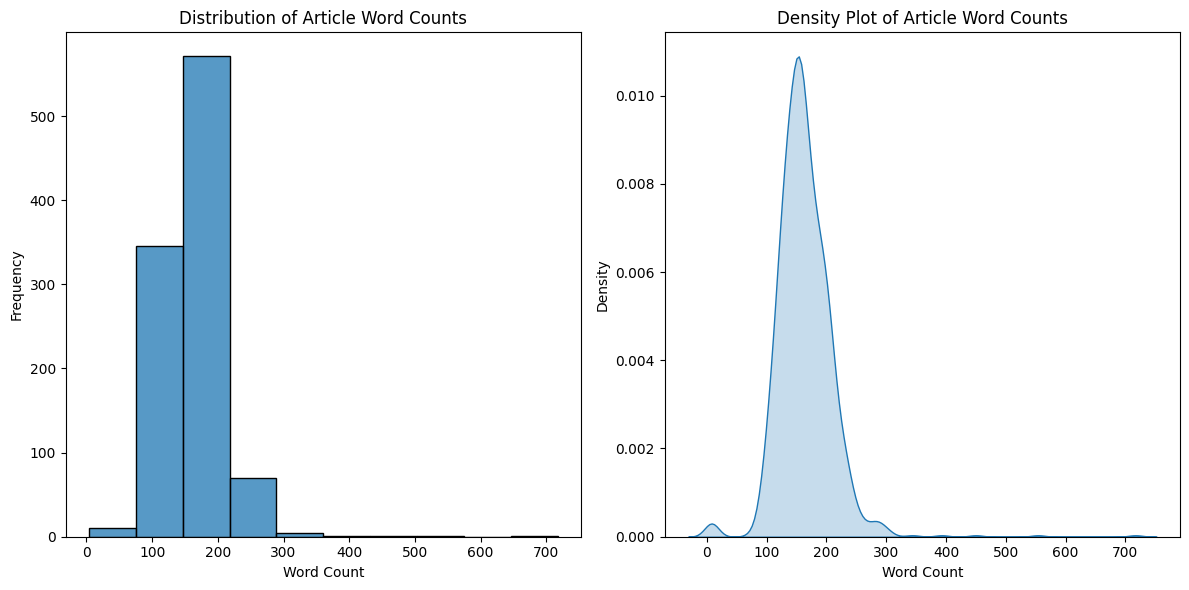

In [68]:
get_segment_num(breeze_contents_df)

## 文章長度

In [38]:
def get_article_len(posts_df):

    df = posts_df.copy()
    # 計算每篇文章的詞數
    df['length'] = df['remove_stopword_content'].str.len()

    # 打印統計數據
    print(df['length'].describe())

    # 繪製詞數分佈的直方圖和密度圖
    plt.figure(figsize=(12, 6))

    # 直方圖
    plt.subplot(1, 2, 1)
    sns.histplot(df['length'], kde=False, bins=10)
    plt.xlabel('Total length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Article Word Counts')

    # 密度圖
    plt.subplot(1, 2, 2)
    sns.kdeplot(df['length'], shade=True)
    plt.xlabel('Total length')
    plt.ylabel('Density')
    plt.title('Density Plot of Article Word Counts')


    plt.tight_layout()
    plt.show()

count    1007.000000
mean      454.442900
std       307.449109
min        74.000000
25%       249.500000
50%       397.000000
75%       567.500000
max      2590.000000
Name: length, dtype: float64


/tmp/ipykernel_1176836/3649360305.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['length'], shade=True)


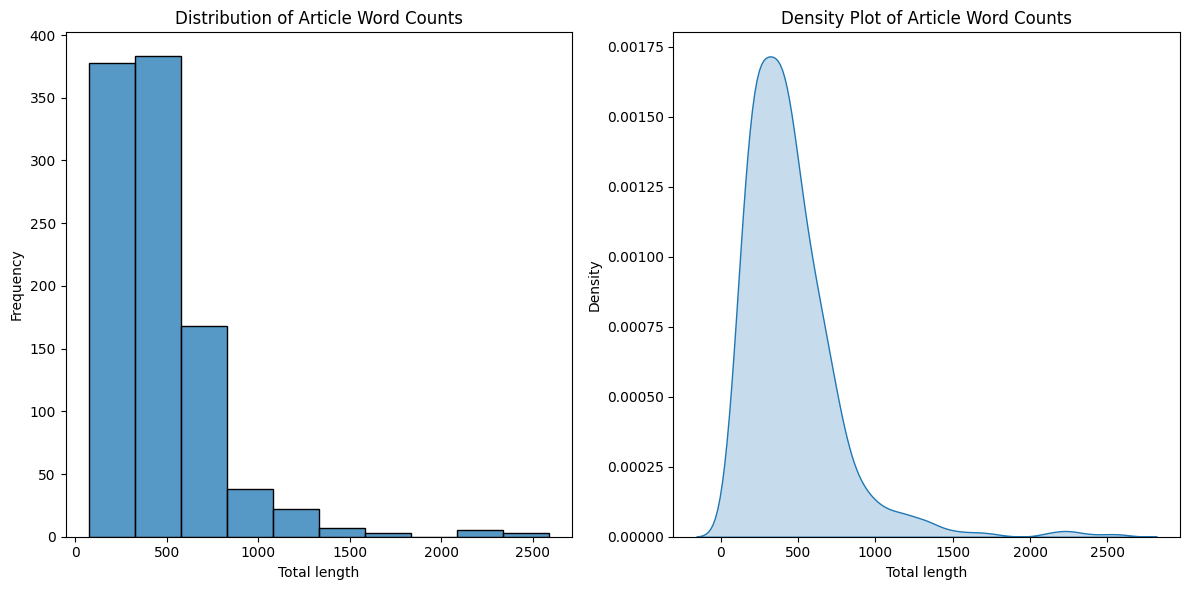

In [39]:
get_article_len(ptt_contents_df)

count    1006.000000
mean      266.073559
std        57.432292
min        22.000000
25%       227.250000
50%       259.000000
75%       299.750000
max       507.000000
Name: length, dtype: float64


/tmp/ipykernel_1176836/3649360305.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['length'], shade=True)


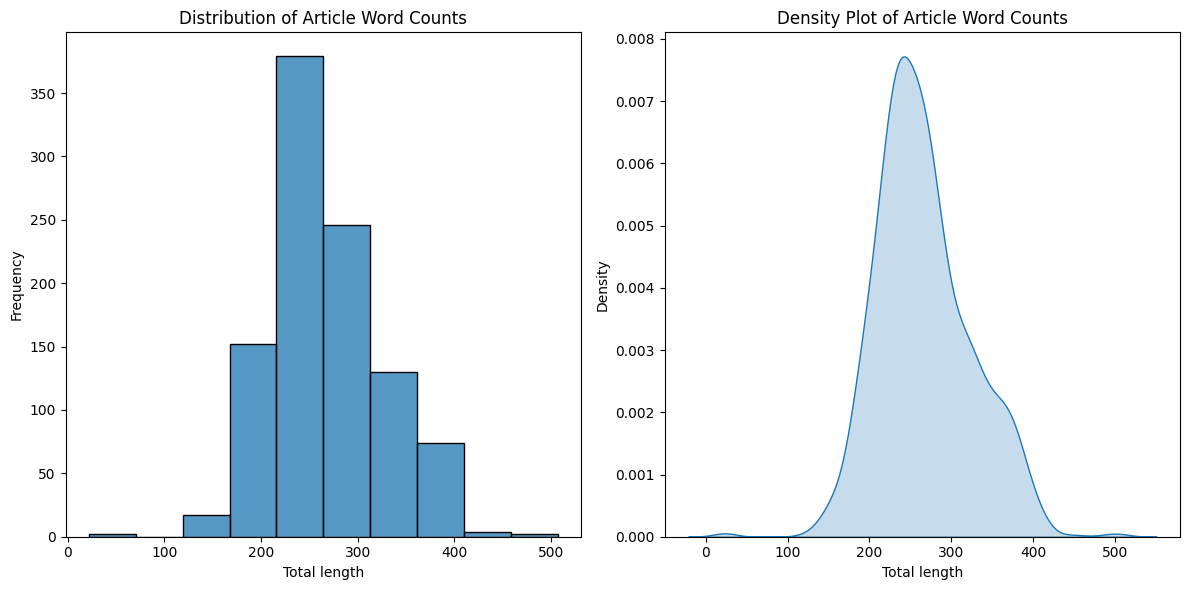

In [40]:
get_article_len(gpt_contents_df)

count    1006.000000
mean      307.900596
std        86.404314
min        10.000000
25%       257.000000
50%       297.500000
75%       353.750000
max      1370.000000
Name: length, dtype: float64


/tmp/ipykernel_1176836/3649360305.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['length'], shade=True)


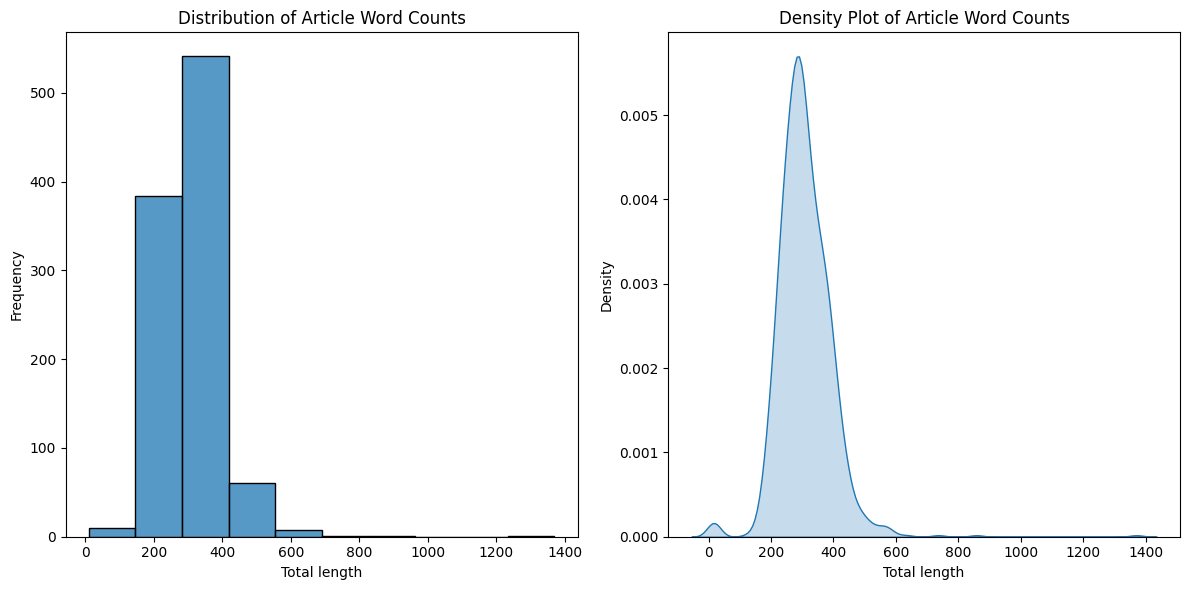

In [69]:
get_article_len(breeze_contents_df)